<a href="https://colab.research.google.com/github/MuayThaiLegz/CRC_com_vision/blob/main/crc_com_vision_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
from pandas.plotting import scatter_matrix

from tensorflow import keras
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the required packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
# instatiatiing a small covnet
from numpy.random import choice, uniform, randn

# Importing all necessary libraries
from tensorflow.keras import layers
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
from PIL import Image
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(12):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # plt.xlabel(class_names[labels[i]])
    plt.show()

In [84]:
def load_data():
    """
        Load the data:
        Number of training examples: 51 images per class
        Number of testing examples: 10 images per class
        Image shape: (400, 400, 3)
        Number of classes: 3
    """
    datasets = ['../content/drive/MyDrive/CRCCV/data/Train_dir/', '../content/drive/MyDrive/CRCCV/data/Test_dir/']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            print(folder)
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# COLOR_BGR2RGB RNG_NORMAL
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [85]:
class_names = ['Kuba','Gendje', 'Kazak']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (400, 400)

(train_images, train_labels), (test_images, test_labels) = load_data()

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]
train_images = train_images / 400
test_images = test_images / 400
print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Loading ../content/drive/MyDrive/CRCCV/data/Train_dir/
Kuba


100%|██████████| 51/51 [00:01<00:00, 30.89it/s]


Gendje


100%|██████████| 51/51 [00:02<00:00, 22.77it/s]


Kazak


100%|██████████| 51/51 [00:01<00:00, 33.20it/s]


Loading ../content/drive/MyDrive/CRCCV/data/Test_dir/
Kazak


100%|██████████| 10/10 [00:00<00:00, 27.44it/s]


Gendje


100%|██████████| 10/10 [00:00<00:00, 13.86it/s]


Kuba


100%|██████████| 10/10 [00:00<00:00, 18.56it/s]


Number of training examples: 153
Number of testing examples: 30
Each image is of size: (400, 400)


ValueError: ignored

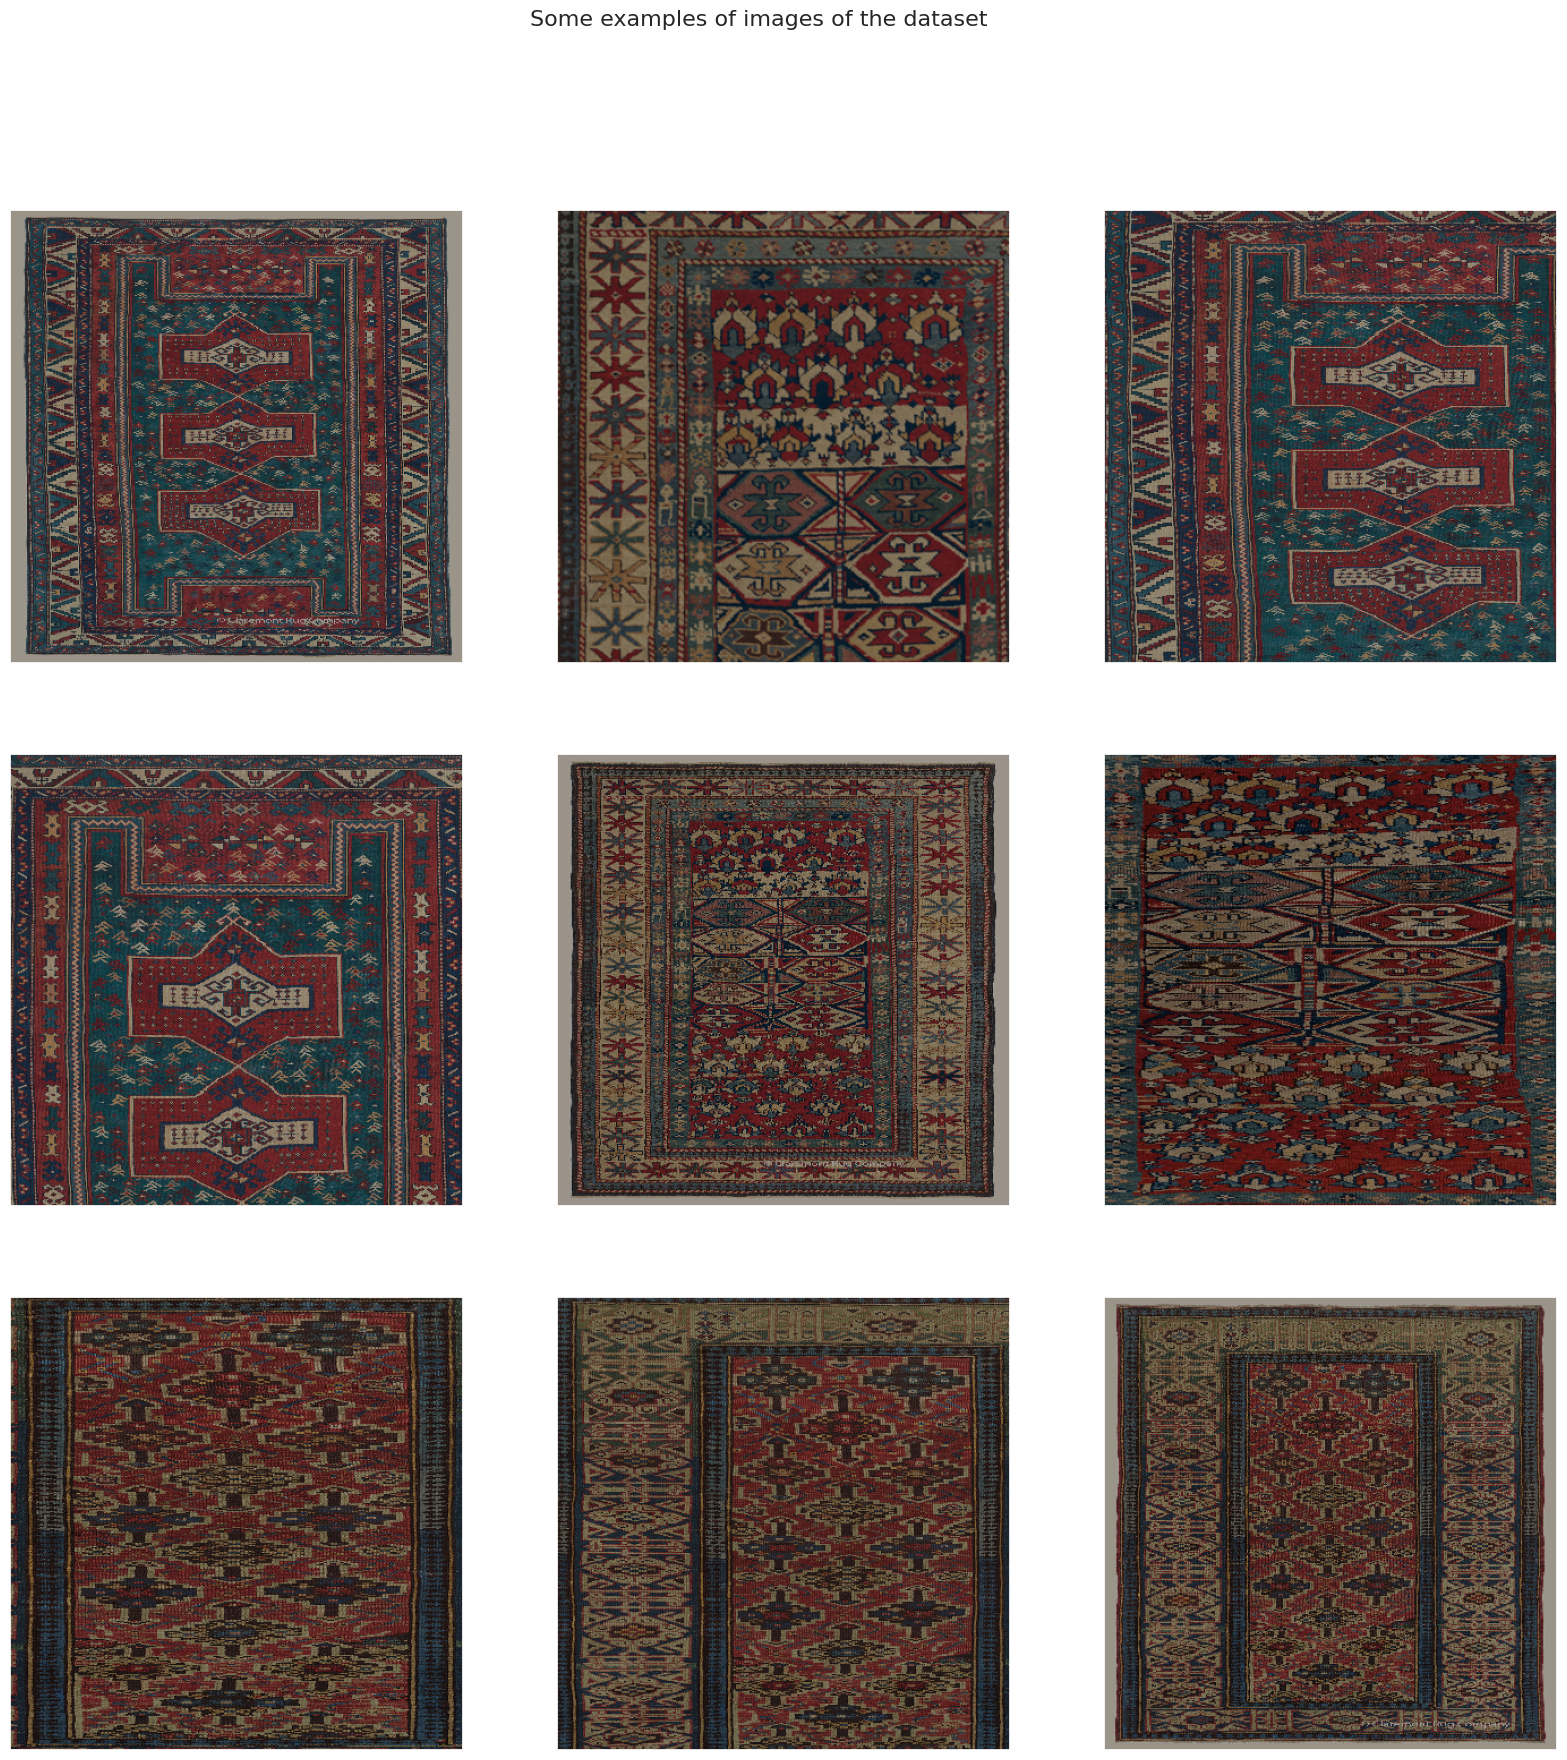

In [86]:
display_examples(class_names,train_images,train_labels)

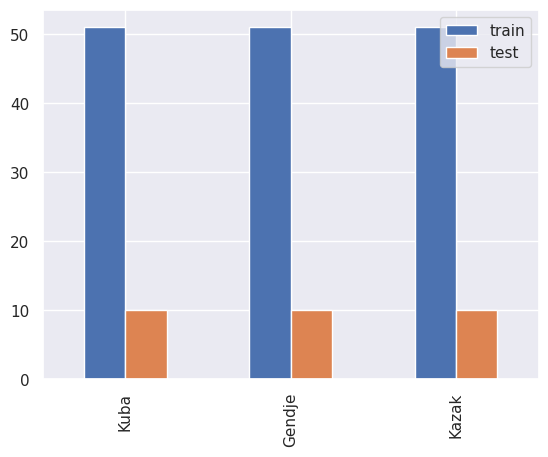

In [87]:
import pandas as pd



_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names_label
            ).plot.bar()


plt.show()

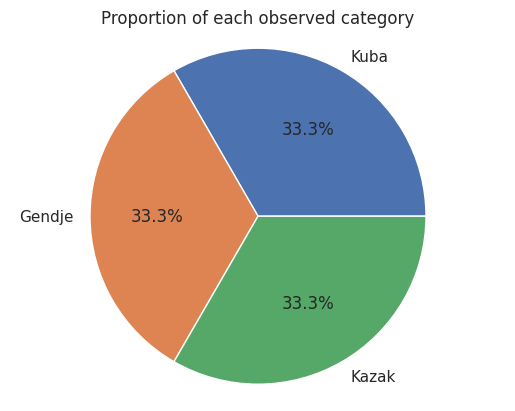

In [88]:
plt.pie(train_counts,
        explode=(0, 0, 0) ,
        labels=class_names_label,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [137]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(400, 400, 3))

# Make sure that the base_model is not trainable
base_model.trainable = False

# Create the custom model architecture
modelz = Sequential([
    base_model, # Add the VGG16 base model
    Conv2D(8, (5, 5), activation='relu', padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2), # Reduced stride
    # MaxPooling2D(2, 2), # Reduced stride
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(2, 2), # Reduced stride
    Flatten(),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])


# Compile the model
modelz.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['acc'],
    optimizer='adam'
)

history = modelz.fit(train_images,train_labels,epochs=100,batch_size=64)

Epoch 1/100
3/3 [==============================] - 3s 189ms/step - loss: 1.1019 - acc: 0.3464
Epoch 2/100
3/3 [==============================] - 1s 192ms/step - loss: 1.1129 - acc: 0.3072
Epoch 3/100
3/3 [==============================] - 1s 188ms/step - loss: 1.1025 - acc: 0.3007
Epoch 4/100
3/3 [==============================] - 1s 190ms/step - loss: 1.0961 - acc: 0.3856
Epoch 5/100
3/3 [==============================] - 1s 191ms/step - loss: 1.0961 - acc: 0.4444
Epoch 6/100
3/3 [==============================] - 1s 189ms/step - loss: 1.0913 - acc: 0.4837
Epoch 7/100
3/3 [==============================] - 1s 192ms/step - loss: 1.0847 - acc: 0.4641
Epoch 8/100
3/3 [==============================] - 1s 189ms/step - loss: 1.0748 - acc: 0.3333
Epoch 9/100
3/3 [==============================] - 1s 190ms/step - loss: 1.0453 - acc: 0.3725
Epoch 10/100
3/3 [==============================] - 1s 189ms/step - loss: 1.0173 - acc: 0.4248
Epoch 11/100
3/3 [==============================] - 1s 189m

In [138]:
# Evaluating model on validation data
evaluate = modelz.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 403ms/step - loss: 10.8042 - acc: 0.5667


In [121]:
predictions = modelz.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


1/1 [==============================] - 0s 214ms/step


In [124]:

# Testing predictions and the actual label
checkImage = test_images[10:11]
checklabel = test_labels[10:11]

predict = modelz.predict(np.array(checkImage))

output = {0:'Kazak',1:'Kuba',2:'Gengje'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

1/1 [==============================] - 0s 21ms/step
Actual :-  [1]
Predicted :-  Gengje


In [125]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
# display(plot_accuracy_loss(history))

score = modelz.predict(test_images)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



1/1 [==============================] - 0s 74ms/step
Test loss: [0.5417875  0.01407947 0.44413298]
Test accuracy: [1.1276998e-04 3.5577002e-06 9.9988365e-01]


In [126]:
print('It is referred to the proportion of correct predictions among all predictions for a particular class.:', precision_score(test_labels, pred_labels, average=None))

print('Recall: It is referred to the proportion of examples of a specific class that have been predicted by the model as belonging to that class.:', recall_score(test_labels, pred_labels, average=None))

print('It provides precision, recall, and F1 score at individual and global levels. Here support is the count of samples.:',classification_report(test_labels, pred_labels, target_names=class_names))

It is referred to the proportion of correct predictions among all predictions for a particular class.: [0.77777778 0.5        0.63636364]
Recall: It is referred to the proportion of examples of a specific class that have been predicted by the model as belonging to that class.: [0.7 0.5 0.7]
It provides precision, recall, and F1 score at individual and global levels. Here support is the count of samples.:               precision    recall  f1-score   support

        Kuba       0.78      0.70      0.74        10
      Gendje       0.50      0.50      0.50        10
       Kazak       0.64      0.70      0.67        10

    accuracy                           0.63        30
   macro avg       0.64      0.63      0.63        30
weighted avg       0.64      0.63      0.63        30



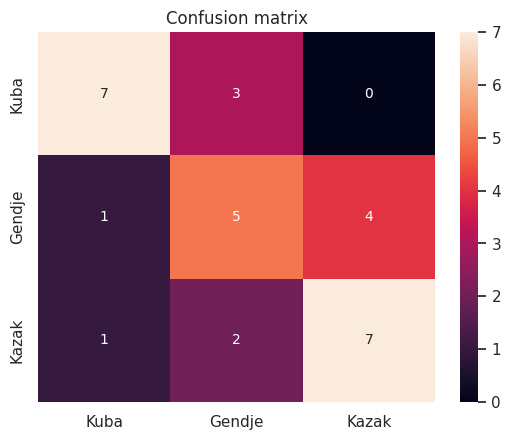

In [127]:

CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


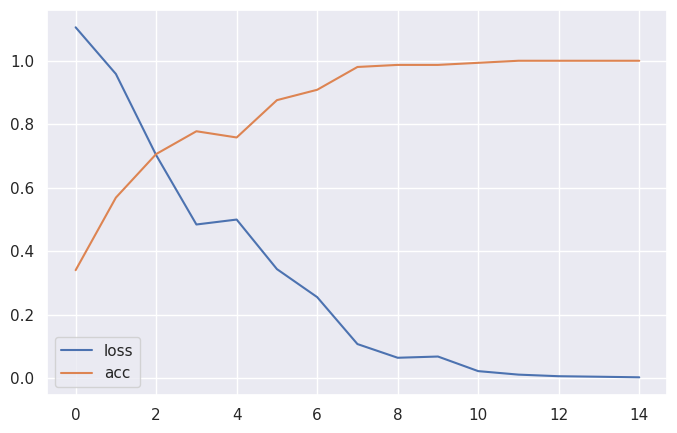

In [105]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [60]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(len(images)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # plt.xlabel(class_names[labels[i]])
    plt.show()

def corect_labeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of corectly images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 1)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
# modelz = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(8, (5, 5), activation = 'relu', input_shape = (400, 400, 3)),
#     tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),

#     tf.keras.layers.MaxPooling2D(4,4),

#     tf.keras.layers.Conv2D(64, (2, 2), activation = 'relu'),
#     tf.keras.layers.Conv2D(128, (2, 2), activation = 'relu'),

#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(40, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(16, activation=tf.nn.relu),

#     tf.keras.layers.Dense(3, activation=tf.nn.softmax)
# ])


# modelz.compile(
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'],
#               optimizer='adam'
#              )

# history = modelz.fit(train_images,train_labels,epochs=100,batch_size=32)

In [ ]:
# modelz.evaluate(test_images, test_labels)
# predictions = modelz.predict(test_images)     # Vector of probabilities
# pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
# CM = confusion_matrix(test_labels, pred_labels)
# ax = plt.axes()
# sn.heatmap(CM, annot=True,
#            annot_kws={"size": 10},
#            xticklabels=class_names,
#            yticklabels=class_names, ax = ax)
# ax.set_title('Confusion matrix')
# plt.show()

# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca()
# plt.show()

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
def display_random_image(class_names, images, classes):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure(figsize=(12,7))
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()



In [ ]:


display(test_loss = modelz.evaluate(test_images, test_labels))


In [ ]:
# predictions = modelz.predict(test_images)     # Vector of probabilities
# pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

# print(pred_labels)
# display_random_image(class_names, test_images, pred_labels)

In [ ]:
class_names = ['Kazak', 'Kuba', 'Shirvan', 'Gendje','Qashaqai']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)


In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(len(images)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)

    plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


In [ ]:
def print_cor_labeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of corectly images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 1)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
print_cor_labeled_images(class_names, test_images, test_labels, pred_labels)

In [ ]:
src_path_train = "data/Train_dir/"
src_path_test = "data/Test_dir/"


batch_size = 12

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1 / 455.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.1)

val_datagen = ImageDataGenerator(rescale=1 / 455.0)

test_datagen = ImageDataGenerator(rescale=1 / 455.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(455, 455),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="sparse",
    subset='training',
    shuffle=True,
    seed=42
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(455, 455),
    color_mode="grayscale",
    batch_size=4,
    class_mode=None,
    shuffle=False,
    seed=42
)

In [ ]:
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(455, 455),
    color_mode="grayscale",
    batch_size=1,
    class_mode="sparse",
    subset='validation',
    shuffle=True,
    seed=42
)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (455, 455, 1)),
    tf.keras.layers.Conv2D(175, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(175, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(200, (3,3), activation = 'relu'),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historY = model.fit_generator(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=20)


### pd.DataFrame(historY.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()


In [ ]:
model.evaluate_generator(valid_generator)

In [ ]:
model.predict_generator(test_generator)

In [ ]:
score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predict=model.predict_generator(valid_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

In [ ]:
class_names = ['Gendje','Kazak', 'Kuba', 'Qashaqai']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (500, 500)

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['../pic_file/Data/Train_dir', '../pic_file/Data/Test_dir']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()


In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

In [ ]:
display(class_names_label)

display(nb_classes)

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(500,500,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
#model.add(Layers.Dense(180,activation='relu'))
#model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(4,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
trained = model.fit(train_images,train_labels,epochs=30,validation_split=0.20)

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model.evaluate(test_images,test_labels, verbose=1)
